In [4]:
import pandas as pd
import numpy as np

In [42]:
data = pd.DataFrame()
n_samples=1000

cluster1_vals = np.random.multivariate_normal([1.0, 1.0], [[0.1, 0], [0, 0.1]], 250)
cluster2_vals = np.random.multivariate_normal([0.0, 1.0], [[0.1, 0], [0, 0.1]], 250)
cluster3_vals = np.random.multivariate_normal([1.0, 0.0], [[0.1, 0], [0, 0.1]], 250)
cluster4_vals = np.random.multivariate_normal([0.0, 0.0], [[0.1, 0], [0, 0.1]], 250)
cluster5_vals = np.random.multivariate_normal([1.75, 1.75], [[0.1, 0], [0, 0.1]], 250)

all_vals = np.array(list(cluster1_vals) + list(cluster2_vals) + list(cluster3_vals) + list(cluster4_vals)+ list(cluster5_vals))

labels = [1]*250 + [0]*1000

In [43]:
data['gene_1'] = all_vals[:,0]
data['gene_2'] = all_vals[:,1]
data['class'] = labels

<Axes: xlabel='gene_1', ylabel='gene_2'>

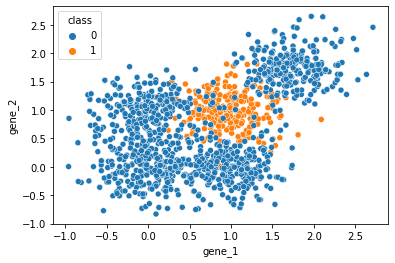

In [44]:
import seaborn as sns

sns.scatterplot(data=data, x='gene_1', y='gene_2', hue='class')

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

feats = ['gene_1','gene_2']

X = data[feats]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

pipe.fit(X_train, y_train)
print("Train: ", pipe.score(X_train, y_train))
print("Test: ", pipe.score(X_test, y_test))

Train:  1.0
Test:  0.9329073482428115


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

feats = ['gene_1','gene_2']

X = data[feats]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)
print("Train: ", pipe.score(X_train, y_train))
print("Test: ", pipe.score(X_test, y_test))

Train:  0.8014941302027748
Test:  0.792332268370607


In [85]:
n_clusters = 30
n_dims = 10
samples_per_cluster = 250
num_pos_clusters = 10

cluster_means = np.random.randint(0, 10, (n_clusters, n_dims))
cov = np.eye(n_dims) * 0.4
cov = cov + np.random.normal(0, 0.3, cov.shape)

clusters=[]

for i in range(len(cluster_means)):
    clusters.append(np.random.multivariate_normal(cluster_means[i], cov, samples_per_cluster))
    
all_vals = np.concatenate(clusters)
    

/tmp/ipykernel_176320/1219109471.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  clusters.append(np.random.multivariate_normal(cluster_means[i], cov, samples_per_cluster))


<Axes: xlabel='gene_1', ylabel='gene_2'>

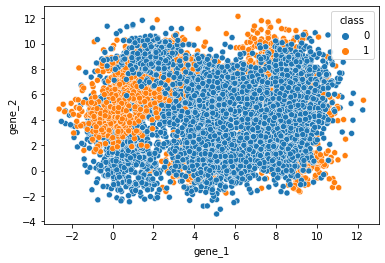

In [86]:
import seaborn as sns

data = pd.DataFrame()

for i in range(n_dims):
    data[f'gene_{i}'] = all_vals[:,i]
    
pos_clusters = np.random.randint(0, n_clusters, num_pos_clusters)

labels = []
for i in range(n_clusters):
    if i in pos_clusters:
        labels += [1]*samples_per_cluster
    else:
        labels += [0]*samples_per_cluster
        
data['class'] = labels
    
sns.scatterplot(data=data, x='gene_1', y='gene_2', hue='class')


<Axes: xlabel='gene_3', ylabel='gene_4'>

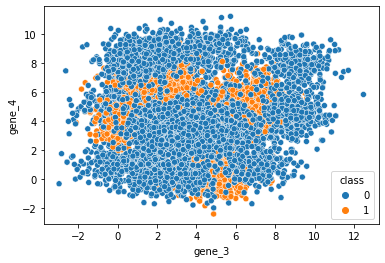

In [87]:
sns.scatterplot(data=data, x='gene_3', y='gene_4', hue='class')

In [88]:

X = data[[i for i in data.columns if i.startswith('gene')]]
y = data['class']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a logistic regression pipeline
pipe = make_pipeline(StandardScaler(), 
                     LogisticRegression())

# Train the model
pipe.fit(X_train, y_train)

# Evaluate the model
print("Train score: ", pipe.score(X_train, y_train))
print("Test score: ", pipe.score(X_test, y_test))

Train score:  0.8556444444444444
Test score:  0.856


In [89]:
X = data[[i for i in data.columns if i.startswith('gene')]]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

pipe.fit(X_train, y_train)
print("Train: ", pipe.score(X_train, y_train))
print("Test: ", pipe.score(X_test, y_test))

Train:  1.0
Test:  0.9973333333333333


In [92]:
from sklearn.neighbors import KNeighborsClassifier

X = data[[i for i in data.columns if i.startswith('gene')]]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

pipe.fit(X_train, y_train)
print("Train: ", pipe.score(X_train, y_train))
print("Test: ", pipe.score(X_test, y_test))

Train:  1.0
Test:  1.0
